In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# Read the json data and convert to dataframes
url = 'logins.json'
data = pd.read_json(url)
print(data.head())
print(data.info())
print(data.columns)
data = pd.to_datetime(data.login_time)
data = pd.DataFrame(data)
data.columns = ['login']
print(data.head())

#Sorting by login time and grouping based on 15mins interval
data.sort_values(by='login', inplace=True)
data.set_index('login', inplace=True)

df = data.resample('15min').size()
#data.rename(columns={0 : 'title',1 : 'author'},inplace=True)
df.columns = ['login','count']
print(df.columns)
df.head()

           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB
None
Index(['login_time'], dtype='object')
                login
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21
['login', 'count']


login
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15T, dtype: int64

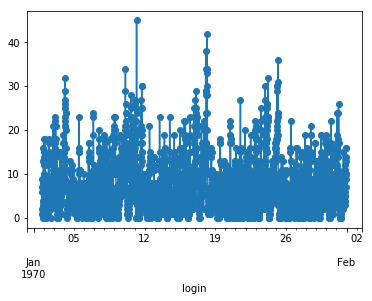

In [3]:
df['1970-01-01':'1970-01-31'].plot(marker='o', linestyle='-')

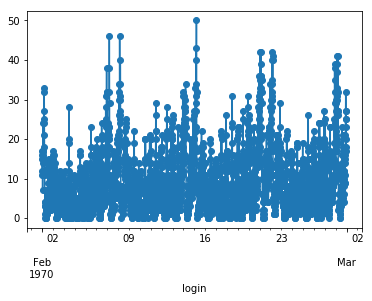

In [4]:
df['1970-02-01':'1970-02-28'].plot(marker='o', linestyle='-')

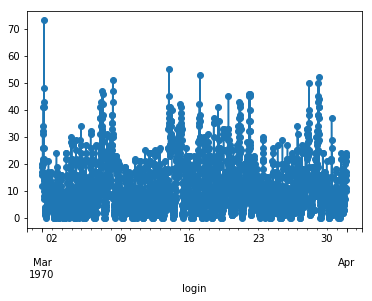

In [5]:
df['1970-03-01':'1970-03-31'].plot(marker='o', linestyle='-')

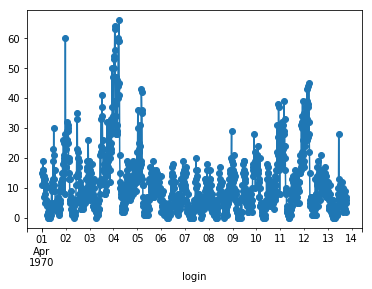

In [6]:
df['1970-04-01':'1970-04-30'].plot(marker='o', linestyle='-')

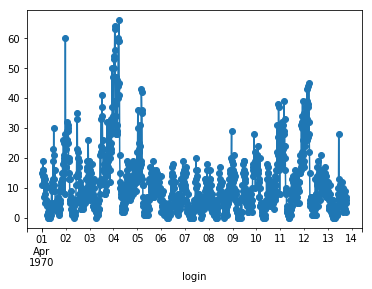

In [7]:
df['1970-04-01':'1970-04-30'].plot(marker='o', linestyle='-')

In [8]:
#df['1970-04-06':'1970-04-06'].plot(marker='o', linestyle='-')
print(df.columns)

['login', 'count']


### Part 2 ‑ Experiment and metrics design

#### 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
    Below metrics would of great help to measure the success of this exprement:
        1. Number of trips between cities Gotham and Metreopolis compared to previous data
        2. Number of cancellation of the trip between cities compared to previous data
        3. Number of the valid reimbursment requested by the drivers and compare it with the active number of drivers in that period.
        
    Why this metrics?
        1. First metrics mentioned above will give the clear figures comoared to old data if the number of the trips between the cities increased or decreased.
        2. Matrics which tell cancellation of the trips between two cities also give very clear 
        understading if this experiment is encouraging drivers enough to travel to other cities or not.
        3. Reimbursment number will also give us better understanding of the success.
        
        We need to look for increase in trips between this two cities vs previous data. And decrease in cancellation by drivers for the trips between this two cities vs previous data.

#### 2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.
    Answer a. Experiment can be done 1. By calculating %increase in trips between cities compared to previous data. 2. decrease in cancellation of trips from one citi to another 
    2. t test can be used to verify the significance of increase in trips with result of p>0.5

#### Part 3 ‑ Predictive modeling

#### 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [11]:
# Load json and convert to dataframe
url = 'ultimate_data_challenge.json'
with open('ultimate_data_challenge.json') as f:
   data = json.load(f)
df = pd.DataFrame(data)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [12]:
# check for number of missing values in each column
df.isna().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [13]:
# Fill missing values in avg_rating_of_driver by calculating mean of the ratings
df_clean = df
df_clean['avg_rating_of_driver'].fillna(df_clean['avg_rating_of_driver'].mean(), inplace = True)
df_clean['avg_rating_by_driver'].fillna(df_clean['avg_rating_by_driver'].mean(), inplace = True)

# There are 396 phone values missing out of 50000 which is small proportion so as of now , lets keep it as it is. 
df_clean.isna().sum()

avg_dist                    0
avg_rating_by_driver        0
avg_rating_of_driver        0
avg_surge                   0
city                        0
last_trip_date              0
phone                     396
signup_date                 0
surge_pct                   0
trips_in_first_30_days      0
ultimate_black_user         0
weekday_pct                 0
dtype: int64

In [14]:
# Stats for numberic column
df_clean.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.445753,0.564977,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [15]:
# Check the number of rows
df_clean.shape

(50000, 12)

In [16]:
# Find out active users
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [17]:
# Find out the active users

# Convert the last_trip_date and signup_date to datetime
df_clean['last_trip_date'] = pd.to_datetime(df_clean['last_trip_date'])
df_clean['signup_date'] = pd.to_datetime(df_clean['signup_date'])

df_clean.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [18]:
df_clean.sort_values('last_trip_date')[-1:]['last_trip_date']
#df.head()

45357   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

In [19]:
# Active users
df_clean['active_user'] = np.where(df_clean['last_trip_date']>='2014-5-31', 1, 0)
df_clean.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_user
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


C:\Users\Reena\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'log(frequency)')

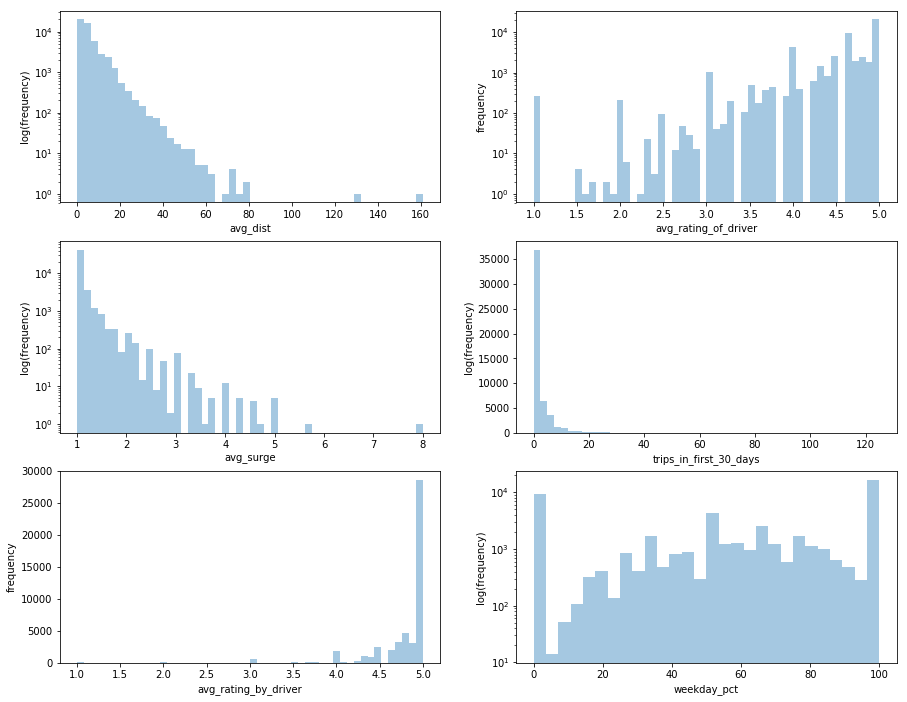

In [20]:
# Univariant plots
fig, ax=plt.subplots(3,2)
fig.set_size_inches(15,12)

sns.distplot(df_clean['avg_dist'], kde=False, ax=ax[0,0])
sns.distplot(df_clean['avg_surge'], kde=False, ax=ax[1,0])
sns.distplot(df_clean['avg_rating_of_driver'], kde=False, ax=ax[0,1])
sns.distplot(df_clean['trips_in_first_30_days'], kde=False, ax=ax[1,1])
sns.distplot(df_clean['weekday_pct'], kde=False, ax=ax[2,1])
sns.distplot(df_clean['avg_rating_by_driver'], kde=False, ax=ax[2,0])


ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[2,1].set_yscale('log')

ax[0,0].set_ylabel('log(frequency)')
ax[1,0].set_ylabel('log(frequency)')
ax[0,1].set_ylabel('frequency')
ax[1,1].set_ylabel('log(frequency)')
ax[2,0].set_ylabel('frequency')
ax[2,1].set_ylabel('log(frequency)')

#### 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance

In [21]:
# Finding out if phone type affect the user retention
pd.crosstab(df_clean['phone'],df_clean['active_user'],margins=True)

active_user,0,1,All
phone,,,
Android,11724,3298,15022
iPhone,18790,15792,34582
All,30514,19090,49604


##### From above data ,  Andriod active users are 21.95% vs iphone active users are 45.66%. There are comparatively less active users on Andriod which might be because of the app. Andriod users are less likely to be retened after 6 months.

In [22]:
pd.crosstab(df_clean['trips_in_first_30_days'],df_clean['active_user'],margins=True)

active_user,0,1,All
trips_in_first_30_days,,,
0,9623,5767,15390
1,10901,3207,14108
2,4613,2789,7402
3,2065,1723,3788
4,1229,1333,2562
5,675,941,1616
6,461,673,1134
7,324,495,819
8,196,393,589


##### Looking at above data, it lloks like that if trips in first 30 days are 4 or more than the active users start to increase in comparision to non active. It would be great to focus the marketing strategy around first 5-10 ride for new users in their first month to increase retention.

In [23]:
pd.crosstab(df_clean['ultimate_black_user'],df_clean['active_user'],margins=True)

active_user,0,1,All
ultimate_black_user,,,
False,21535,9611,31146
True,9242,9612,18854
All,30777,19223,50000


##### As seen from above data Ultimate black user is not very useful to predict the user retention.

In [24]:
# Find out if city impact active users
pd.crosstab(df_clean['city'], df_clean['active_user'], margins=True)

active_user,0,1,All
city,,,
Astapor,12137,4397,16534
King's Landing,3721,6409,10130
Winterfell,14919,8417,23336
All,30777,19223,50000


##### 1. Astapor have 26.5% active users   2. King's Landing have 63.2% active users   3. Winterfell have 36.06% active users. This can be useful information to dig into more to find out why there are comparatively less active  users in Astapor and winterfall. Is it related to service in that city?

In [32]:
# Encoding categorical data
df_enc = pd.get_dummies(df_clean,  prefix='one_hot_enc', columns=['city', 'phone','ultimate_black_user'])
df_enc.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,active_user,one_hot_enc_Astapor,one_hot_enc_King's Landing,one_hot_enc_Winterfell,one_hot_enc_Android,one_hot_enc_iPhone,one_hot_enc_False,one_hot_enc_True
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,46.2,1,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,50.0,0,1,0,0,1,0,1,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,100.0,0,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,80.0,1,0,1,0,0,1,0,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,82.4,0,0,0,1,1,0,1,0


In [33]:
feature_cols = list(df_enc.columns.values)

# Remove target variable and other independent variable which are not required
feature_cols.remove('active_user')
feature_cols.remove('signup_date')
feature_cols.remove('last_trip_date')
feature_cols

['avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'surge_pct',
 'trips_in_first_30_days',
 'weekday_pct',
 'one_hot_enc_Astapor',
 "one_hot_enc_King's Landing",
 'one_hot_enc_Winterfell',
 'one_hot_enc_Android',
 'one_hot_enc_iPhone',
 'one_hot_enc_False',
 'one_hot_enc_True']

In [95]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

X = df_enc[feature_cols]
y = df_enc['active_user']

X_train, X_test, y_train, y_test = train_test_split(X, df_enc['active_user'], test_size = 0.25, random_state = 0)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

#Model scores for test data
print(accuracy_score(classifier.predict(X_test), y_test))
print(roc_auc_score(classifier.predict(X_test), y_test))

# Predicting the Test set results
y_pred = classifier.predict(X_test)

print(f1_score(y_test, y_pred))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

0.71504
0.7028769883202044
0.5741272118603539
[[6537 1158]
 [2404 2401]]


In [96]:
from sklearn.tree import DecisionTreeClassifier

# Lets try with Decision Tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

#Model scores for test data
print(accuracy_score(classifier.predict(X_test), y_test))
print(roc_auc_score(classifier.predict(X_test), y_test))

# Predicting the Test set results
y_pred = classifier.predict(X_test)

print(f1_score(y_test, y_pred))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

0.70856
0.6919916751577169
0.6199269692227439
[[5886 1809]
 [1834 2971]]


#### As we can see Decision Tree Classifier perform better based on the f1 score. 

#### Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

    -As seen above there are less active users retend on Andriod app, Ultima team should find out the causse of this and fix it to retain more users.
    - Ultima team should chnage the marketing strategy to consider first 5-10 rides with soem incentive for users to make them use the app which increases there chances of retention
    - Based on city data, it loks like Astapor and Winterfell have less active users. This can be useful information to dig into more to find out why there are comparatively less active users in Astapor and winterfall. Is it related to service in that city?